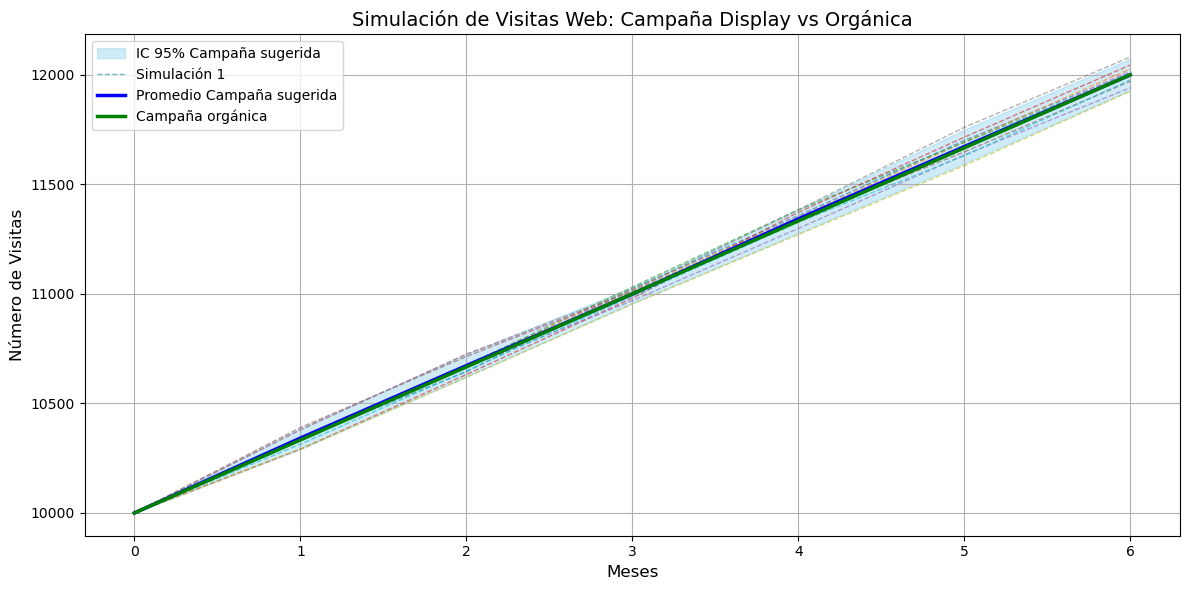

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Parámetros de entrada ---
P = 10000        # Presupuesto en euros
CPM = 7          # Coste por mil impresiones
CTR = 0.002      # Click-through rate (0.2%)
EFECTIVIDAD = 0.7 # Porcentaje de clics que se convierten en visitas reales
T = 6            # Número de meses
V_ORG = 10000    # Visitas mensuales orgánicas base
SIGMA = 30       # Desviación estándar del ruido mensual
N_SIMULACIONES = 10  # Número de escenarios Monte Carlo para graficar

# --- 2. Cálculos base del modelo ---
impresiones = (P / CPM) * 1000
clics = impresiones * CTR
visitas_total = clics * EFECTIVIDAD
visitas_mensual_promedio = visitas_total / T

# --- 3. Generar campañas orgánica y simulada ---
meses = np.arange(T + 1)
visitas_organicas = V_ORG + (meses * ((12000 - 10000) / T))  # crecimiento lineal al 20%

# --- 4. Simulación Monte Carlo de campañas sugeridas ---
simulaciones = []
for _ in range(N_SIMULACIONES):
    ruido = np.random.normal(0, SIGMA, T + 1)
    visitas_simuladas = V_ORG + np.cumsum([0] + [visitas_mensual_promedio + r for r in ruido[1:]])
    simulaciones.append(visitas_simuladas)

# --- 5. Calcular promedio e intervalos de confianza ---
sim_array = np.array(simulaciones)
promedio_sim = sim_array.mean(axis=0)
ic_2_5 = np.percentile(sim_array, 2.5, axis=0)
ic_97_5 = np.percentile(sim_array, 97.5, axis=0)

# --- 6. Visualización ---
plt.figure(figsize=(12, 6))

# Área de intervalo de confianza
plt.fill_between(meses, ic_2_5, ic_97_5, color='skyblue', alpha=0.4, label='IC 95% Campaña sugerida')

# Líneas de simulaciones
for i, sim in enumerate(simulaciones):
    plt.plot(meses, sim, linestyle='--', alpha=0.6, linewidth=1, label=f'Simulación {i+1}' if i < 1 else None)

# Promedio de simulaciones
plt.plot(meses, promedio_sim, color='blue', linewidth=2.5, label='Promedio Campaña sugerida')

# Línea orgánica
plt.plot(meses, visitas_organicas, color='green', linewidth=2.5, label='Campaña orgánica')

# Estética del gráfico
plt.title("Simulación de Visitas Web: Campaña Display vs Orgánica", fontsize=14)
plt.xlabel("Meses", fontsize=12)
plt.ylabel("Número de Visitas", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


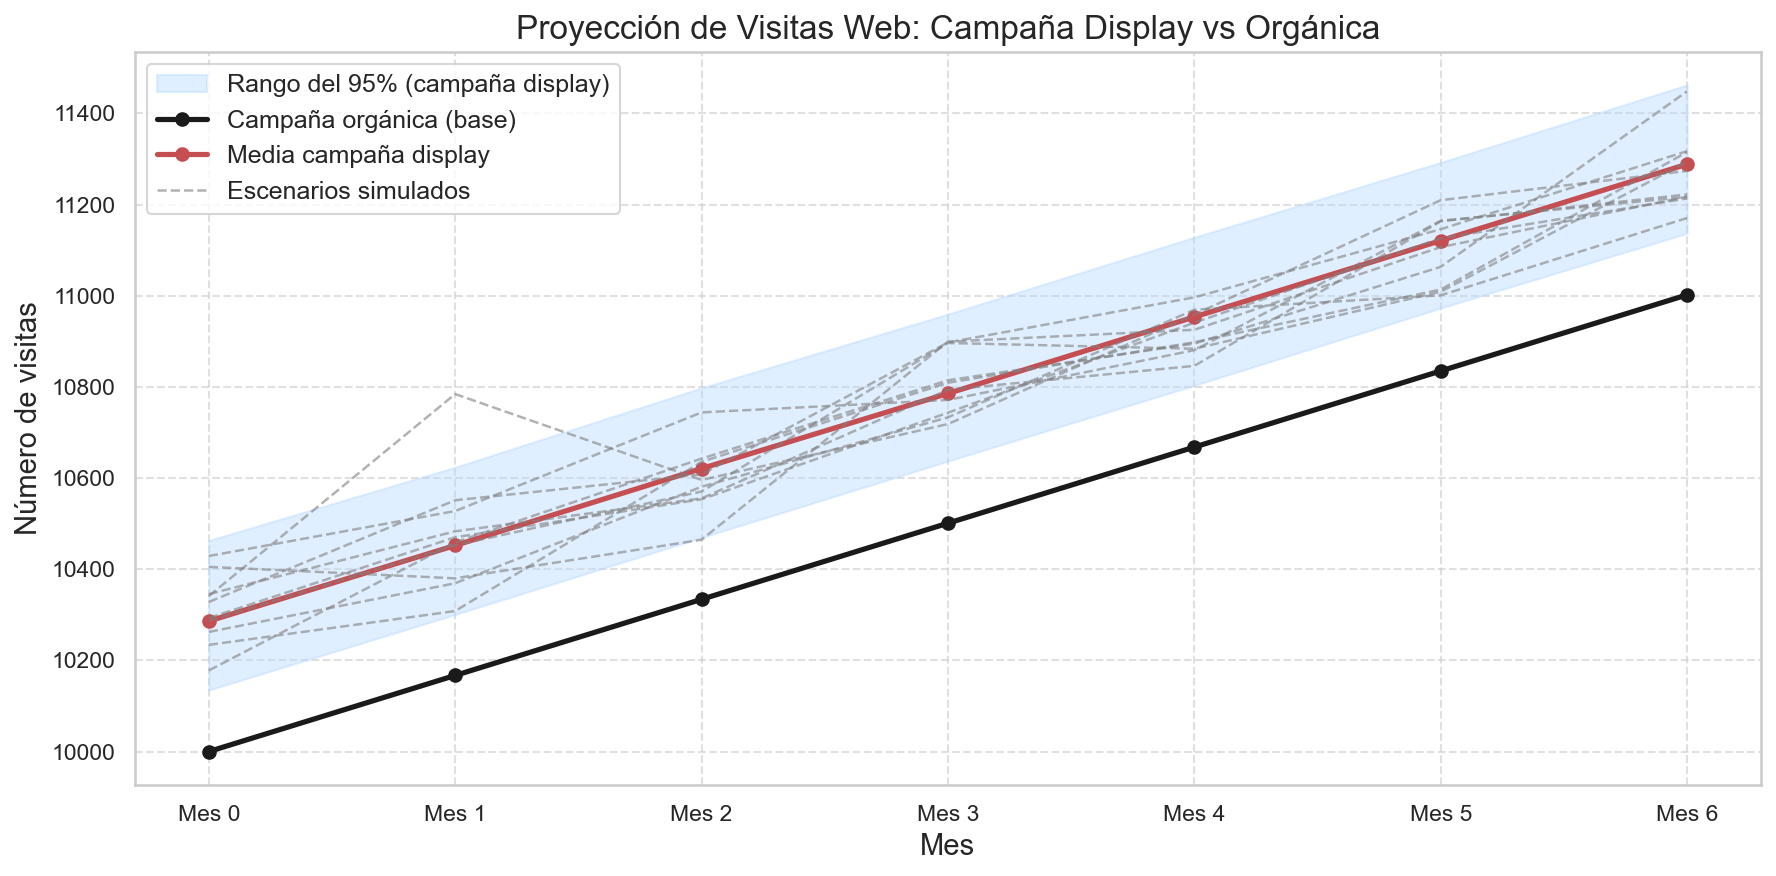

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual moderno
sns.set(style="whitegrid")
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'legend.fontsize': 12,
    'figure.dpi': 150,
})

# Parámetros de simulación
n_sim = 10000
meses = 7
presupuesto = 10000
cpm = 7
impresiones_totales = (presupuesto / cpm) * 1000
impresiones_mensuales = impresiones_totales / meses

# Simulación Monte Carlo con variabilidad mensual
visitas_simuladas = np.zeros((n_sim, meses))

for mes in range(meses):
    ctr = np.random.normal(loc=0.002, scale=0.0005, size=n_sim)
    conversion = np.random.normal(loc=0.7, scale=0.1, size=n_sim)
    ctr = np.clip(ctr, 0, 1)
    conversion = np.clip(conversion, 0, 1)
    clics = impresiones_mensuales * ctr
    visitas = clics * conversion
    visitas_simuladas[:, mes] = visitas

# Visitas orgánicas
visitas_organicas = 10000 + 167 * np.arange(meses)

# Sumar al escenario display
visitas_simuladas += visitas_organicas

# Estadísticas
media_simulada = visitas_simuladas.mean(axis=0)
p2_5 = np.percentile(visitas_simuladas, 2.5, axis=0)
p97_5 = np.percentile(visitas_simuladas, 97.5, axis=0)
muestra_escenarios = visitas_simuladas[np.random.choice(n_sim, 10, replace=False)]

# Gráfico
x = np.arange(meses)
fig, ax = plt.subplots(figsize=(12, 6))

# Área entre percentiles
ax.fill_between(x, p2_5, p97_5, color='#B3D7FF', alpha=0.4, label='Rango del 95% (campaña display)')

# Línea orgánica
ax.plot(x, visitas_organicas, 'o-k', linewidth=2.5, label='Campaña orgánica (base)')

# Media de simulación
ax.plot(x, media_simulada, 'o-r', linewidth=2.5, label='Media campaña display')

# 10 escenarios simulados
for i, esc in enumerate(muestra_escenarios):
    ax.plot(x, esc, '--', linewidth=1.2, alpha=0.6, color='gray', label='Escenarios simulados' if i == 0 else "")

# Etiquetas
ax.set_title("Proyección de Visitas Web: Campaña Display vs Orgánica")
ax.set_xlabel("Mes")
ax.set_ylabel("Número de visitas")
ax.set_xticks(x)
ax.set_xticklabels([f"Mes {i}" for i in x])
ax.legend(loc='upper left')
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig("simulacion_montecarlo_visitas.png", dpi=300)  # ← Guarda imagen HD
plt.show()
